In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
dataset = pd.read_csv("../../datasets/salary.csv")
salary = dataset["salary"]
experience = dataset["experience"]

In [125]:
def slopes(X,Y):
    xy = np.sum(np.multiply(X, Y))
    y = np.sum(Y)
    x =np.sum(X)
    x2 = np.sum(np.multiply(X, X))
    return xy,x,y,x2

In [126]:
def getB(XY,X,Y,X2,N):
    return ((N*XY) -(X*Y))/((N*X2) - (X*X))

In [127]:
def mse(actual, predicted):
    return np.sum(np.square(actual-predicted))/len(actual)

In [128]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(experience,salary)

In [129]:
a,b,c,d = slopes(xtrain, ytrain)
B = getB(a,b,c,d,len(xtrain))
A = (c-(b*B))/len(xtrain)

In [130]:

test = []
graph = []
for i in xtest:
    test.append(A+B*i)
for i in experience:
    graph.append(A+B*i)


In [139]:
mse(ytest, test)

0.34102826953152965

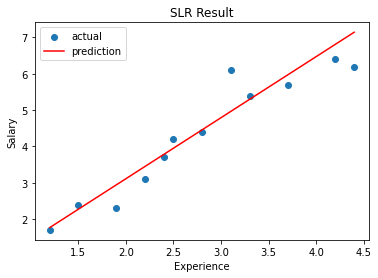

In [132]:
plt.scatter(experience, salary, label = 'actual')
plt.plot(experience, graph, color = 'red', label = 'prediction')
plt.title("SLR Result")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

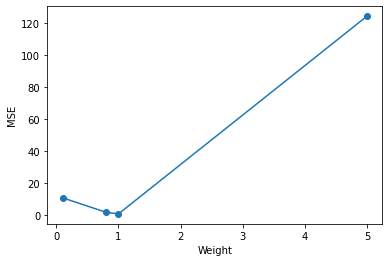

In [140]:
weight = [0.1, 0.8, 1.,5]
bias = 1.1
values = []
for i in weight:
    values.append(mse(bias + i*experience, salary))
plt.plot(weight, values, marker = 'o')
plt.xlabel("Weight")
plt.ylabel("MSE")
plt.show()

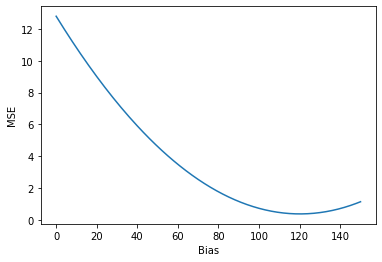

In [134]:
bias = 1.1
values = []
weight = []
for i in range(0,151):
    values.append(mse(bias + i/100*experience, salary))
    weight.append(i)
plt.plot(weight, values)
plt.xlabel("Bias")
plt.ylabel("MSE")
plt.show()

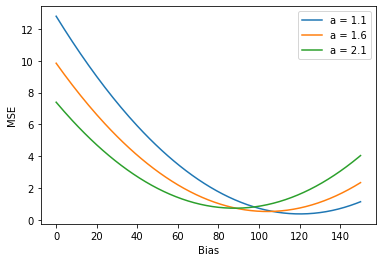

In [135]:
bias = 1.1
v1 = []
v2 = []
v3 = []
weight = []
for i in range(0,151):
    v1.append(mse(bias + i/100*experience, salary))
    v2.append(mse(bias+0.5 + i/100*experience, salary))
    v3.append(mse(bias+1 + i/100*experience, salary))
    weight.append(i)
plt.plot(weight, v1, label = 'a = 1.1')
plt.plot(weight, v2, label = 'a = 1.6')
plt.plot(weight, v3, label = 'a = 2.1')
plt.xlabel("Bias")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(xtrain).reshape(-1,1), np.array(ytrain).reshape(-1,1))
prediction = model.predict(np.array(xtest).reshape(-1,1))
MSE = mse(prediction, np.array(ytest).reshape(-1,1))

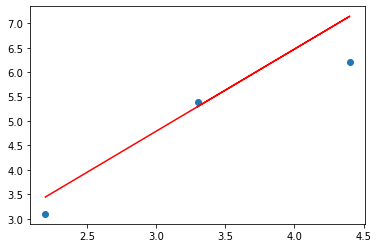

In [137]:
plt.plot(xtest, prediction, color = 'red')
plt.scatter(xtest, ytest)

In [138]:
print(MSE)

0.3410282695315294


### MSE Values are observed to be same